##Dataset classification

Построение классификатора на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

Набор данных состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Считывание датасета, task_data - количество выбранных из датасета строк

In [2]:
df = pd.read_csv('/diabetes.csv')
task_data = df.head(640)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Вывод числа строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).

In [3]:
len(task_data[task_data['Outcome'] == 0])

421

Разделение данных на тренировочные и тестовые. Первые 80% строк — тренировочные, остальные 20% — тестовые.

In [4]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

Выделение предикторов и отклик. Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.

In [5]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Обучение классификатора с использованием DecisionTreeClassifier с параметрами criterion='entropy', max_leaf_nodes = 25, min_samples_leaf = 15 и random_state = 2020.

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', # критерий разделения
                              min_samples_leaf=15, # минимальное число объектов в листе
                              max_leaf_nodes=25, # максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)


Подключение библиотеки для визуализации дерева. Сохранение в файл.

In [7]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

 Глубина дерева

In [8]:
clf.tree_.max_depth

7

Выявление предикторов, по которым выполнено разделение на последнем уровне дерева принятия решений: последние уровни графа, значение разделения - число после <=
Графическое представление:

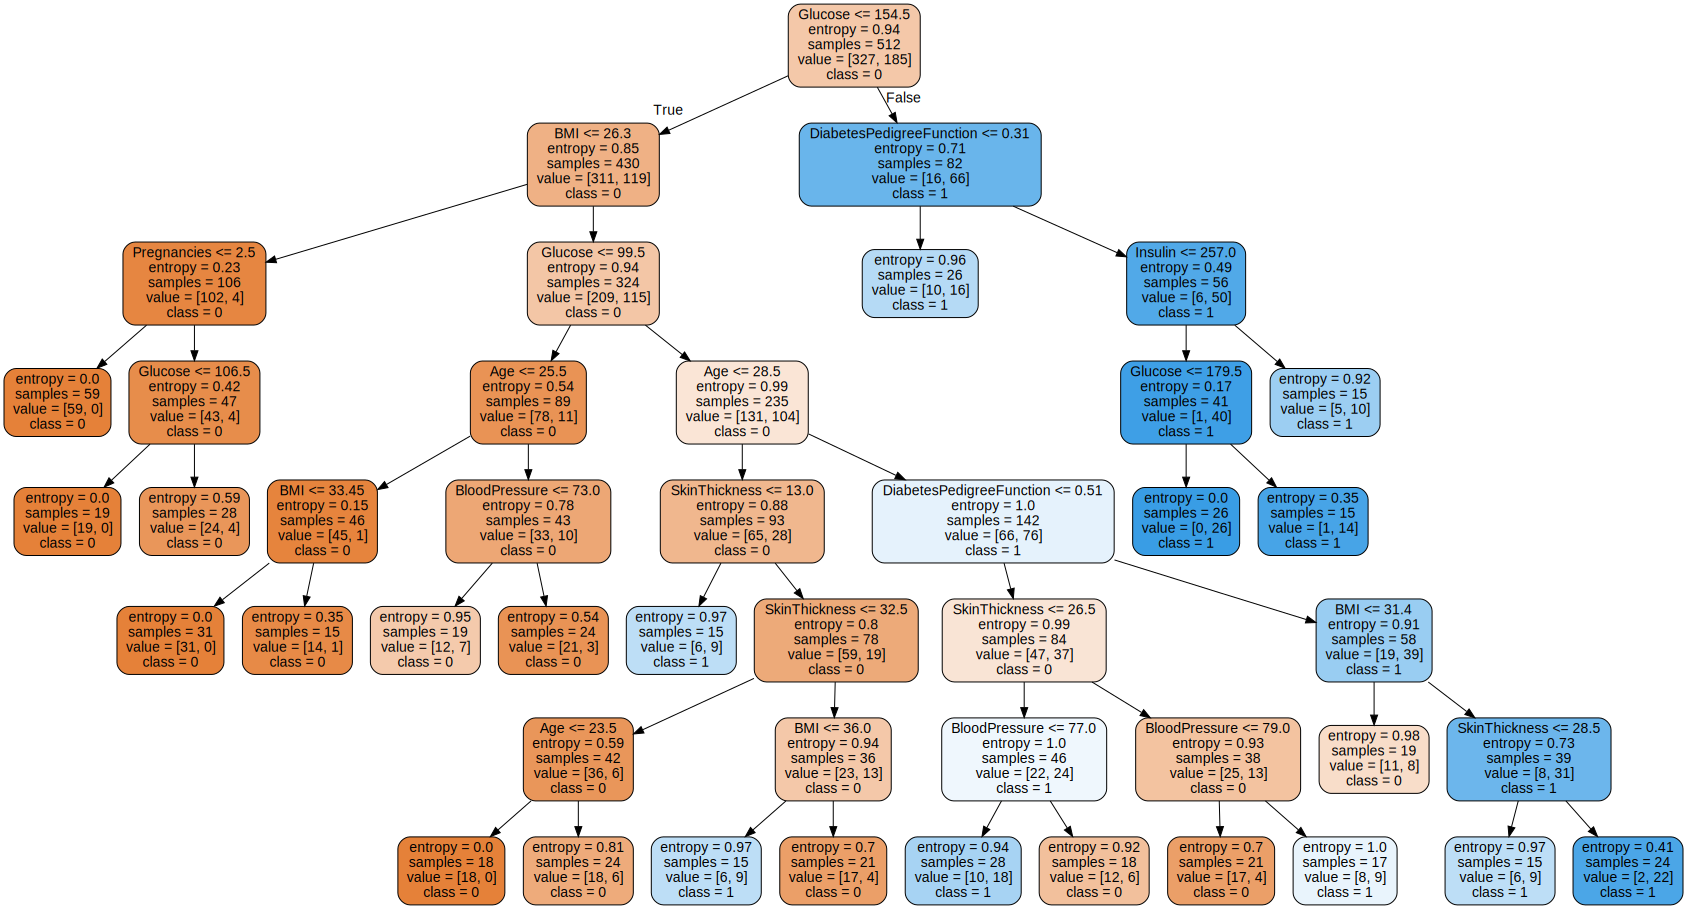

In [9]:
graphviz.Source(dot_graph)

Выполнение предсказания для объектов из тестовой выборки:

In [10]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

Доля правильных ответов

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8046875

Среднее значение метрик  F1  (Macro-F1):

In [12]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.7604611123587095

Предсказание для конкретного объекта (с индексом 743) исходных данных:

In [13]:
df.loc[743, features]

Pregnancies                   9.000
Glucose                     140.000
BloodPressure                94.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          32.700
DiabetesPedigreeFunction      0.734
Age                          45.000
Name: 743, dtype: float64

Назначенный класс:

In [14]:
clf.predict([df.loc[743, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1